In [71]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning, module="sklearn")

%matplotlib inline
plt.style.use('fast')
font1 = {'family':'serif','color':'black','size':20}

In [72]:
from data_handle import global_temperature_data

predictors = "year" #set the column year as the predictor
target = "LandAverageTemperature" #set the column LandAverageTemperature as the thing we need to predict

test, train, x_test, x_train, y_train, future_x, future_y = global_temperature_data(predictors, target)

global_temperatures = pd.read_csv('globaltemperature/GlobalTemperatures.csv', parse_dates=['dt']) #read the data from csv
mean_temp_year = global_temperatures.groupby(global_temperatures.dt.dt.year).mean().drop('dt', axis=1).reset_index().rename({'dt': 'year'}, axis = 1) #group the data by year and made some modifications in the columns
mean_temp_year = mean_temp_year[mean_temp_year.LandAverageTemperatureUncertainty <= 1] #filter out entries with uncertainty > 1 degree celsius
mean_temp_year.head(3)

,year,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
90,1840,7.796250,0.991167,NaN,NaN,NaN,NaN,NaN,NaN
91,1841,7.688167,0.952000,NaN,NaN,NaN,NaN,NaN,NaN
92,1842,8.022750,0.897500,NaN,NaN,NaN,NaN,NaN,NaN


# Linear

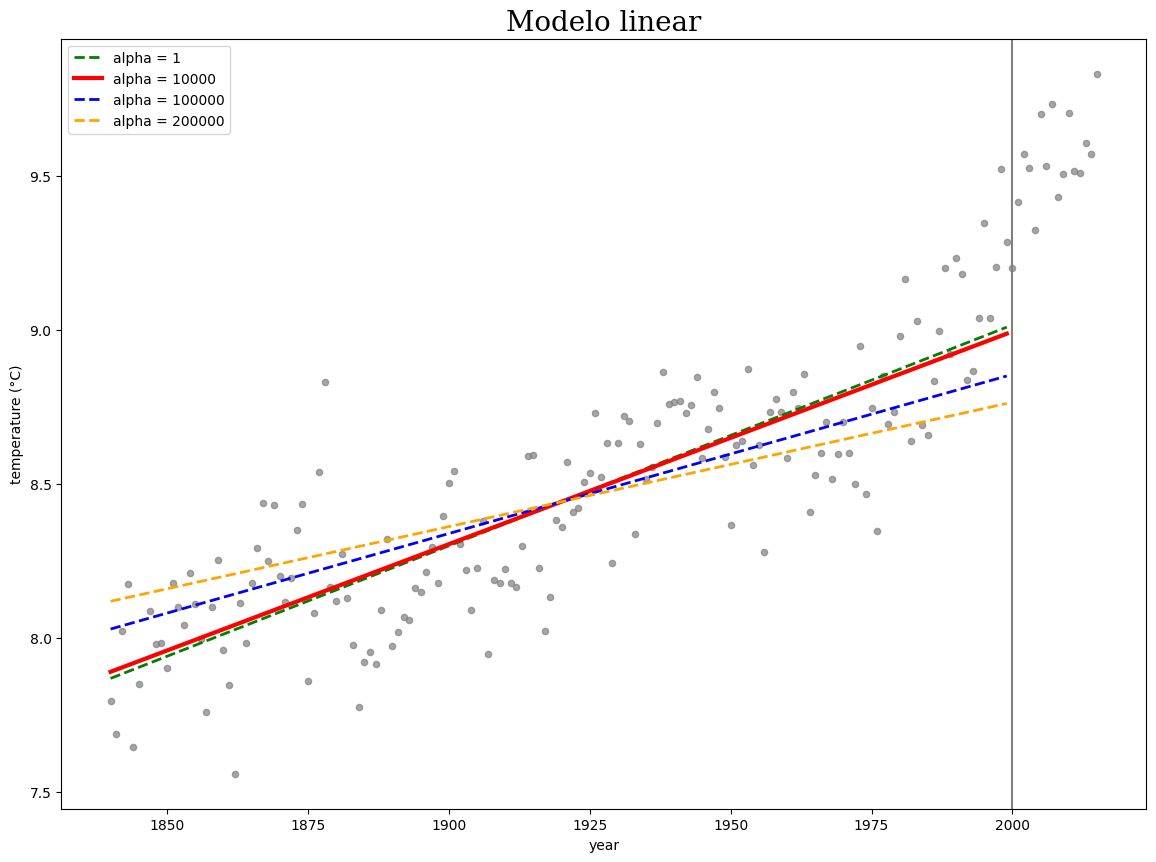

In [73]:
alphas = [1, 10000, 100000, 200000]

linear_predictions = []

for alpha in alphas:
    linear = Ridge(alpha=alpha) #set the ridge regression from sklearn
    linear.fit(x_train, y_train) #apply the ridge regression from sklearn
    linear_predictions.append(linear.predict(x_train)) #predict data of train set with ridge regression 

# making plot bigger
plt.rcParams['figure.figsize'] = [14, 10]

plt.xlabel('year')
plt.ylabel('temperature (°C)')
plt.title('Modelo linear', fontdict = font1)

plt.scatter(mean_temp_year.year, mean_temp_year.LandAverageTemperature, c='grey', alpha = 0.7, s = 20)
plt.axvline(x = 2000, color = 'grey')
p1 = plt.plot(x_train, linear_predictions[0], color='green', lw = 2, ls = '--', label = 'alpha = 1')
p2 = plt.plot(x_train, linear_predictions[1], color='red', lw = 3, label = 'alpha = 10000')
p3 = plt.plot(x_train, linear_predictions[2], color='blue', lw = 2, ls = '--', label = 'alpha = 100000')
p4 = plt.plot(x_train, linear_predictions[3], color='orange', lw = 2, ls = '--', label = 'alpha = 200000')

plt.legend()
plt.savefig('linear_alphas.png', format = 'png')
plt.show()

# Polynomial

# 2 grau

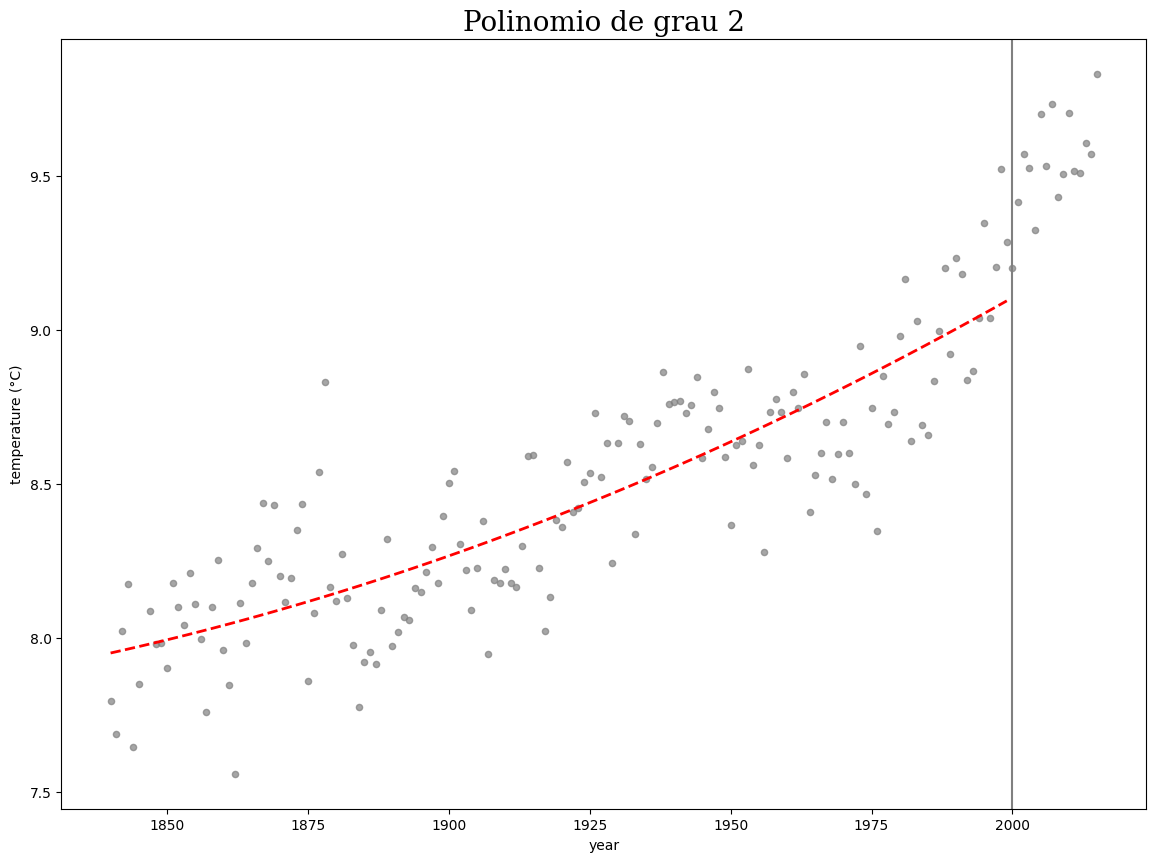

In [74]:
model2D = make_pipeline(PolynomialFeatures(2), Ridge(alpha=10)) 
model2D.fit(x_train, y_train)
D2 = model2D.predict(x_train)

plt.xlabel('year')
plt.ylabel('temperature (°C)')
plt.title('Polinomio de grau 2', fontdict = font1)

plt.scatter(mean_temp_year.year, mean_temp_year.LandAverageTemperature, c='grey', alpha = 0.7, s = 20)
plt.axvline(x = 2000, color = 'grey')
plt.plot(x_train, D2, color='red', lw = 2, ls = '--')

plt.savefig('2d_model.png', format = 'png')
plt.show()

# 4 grau

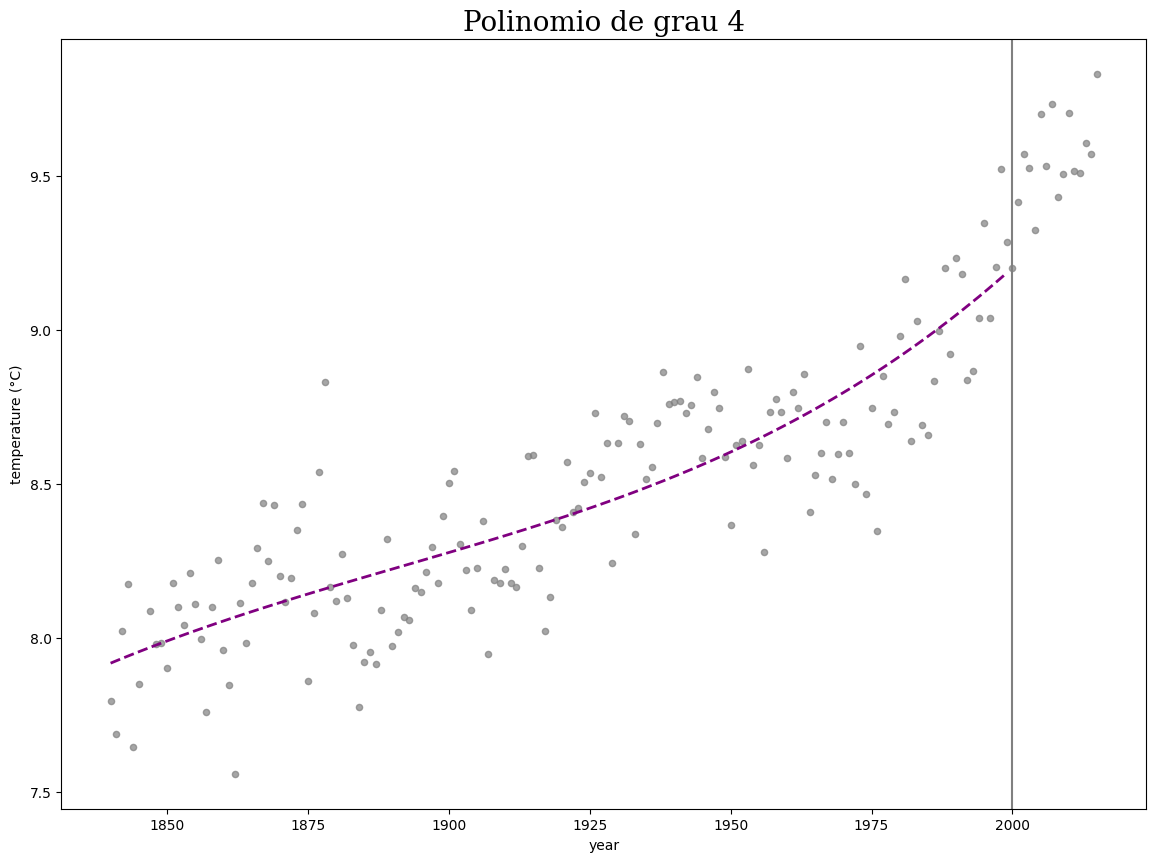

In [75]:
model4D = make_pipeline(PolynomialFeatures(4), Ridge(alpha=1000)) 
model4D.fit(x_train, y_train)
D4 = model4D.predict(x_train)

plt.xlabel('year')
plt.ylabel('temperature (°C)')
plt.title('Polinomio de grau 4', fontdict = font1)

plt.scatter(mean_temp_year.year, mean_temp_year.LandAverageTemperature, c='grey', alpha = 0.7, s = 20)
plt.axvline(x = 2000, color = 'grey')
plt.plot(x_train, D4 , color='purple', lw = 2, ls = '--')

plt.savefig('4d_model.png', format = 'png')
plt.show()

# 6 grau

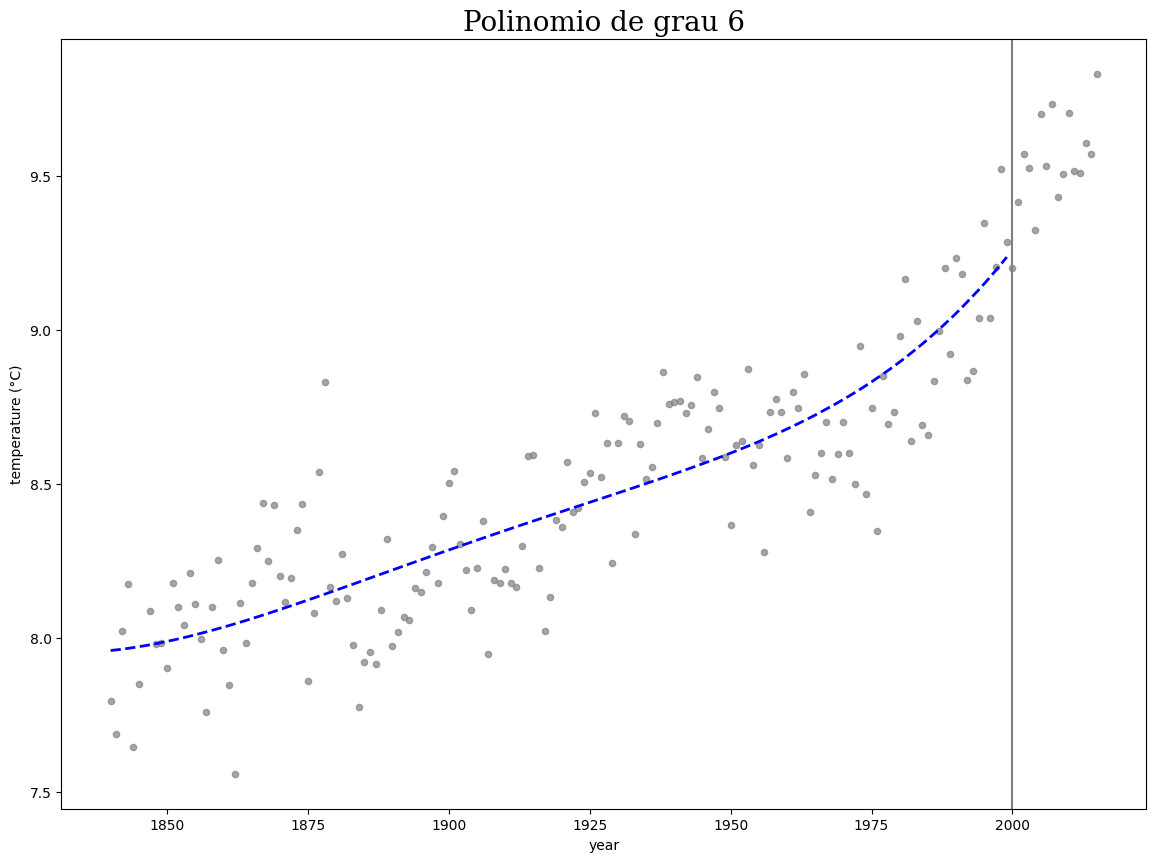

In [76]:
model6D = make_pipeline(PolynomialFeatures(6), Ridge(alpha=100000000)) 
model6D.fit(x_train, y_train)
D6 = model6D.predict(x_train)

plt.xlabel('year')
plt.ylabel('temperature (°C)')
plt.title('Polinomio de grau 6', fontdict = font1)

plt.scatter(mean_temp_year.year, mean_temp_year.LandAverageTemperature, c='grey', alpha = 0.7, s = 20)
plt.axvline(x = 2000, color = 'grey')
plt.plot(x_train, D6, color='blue', lw = 2, ls = '--')

plt.savefig('6d_model.png', format = 'png')
plt.show()

# Dados pós 2000 (melhor modelo)

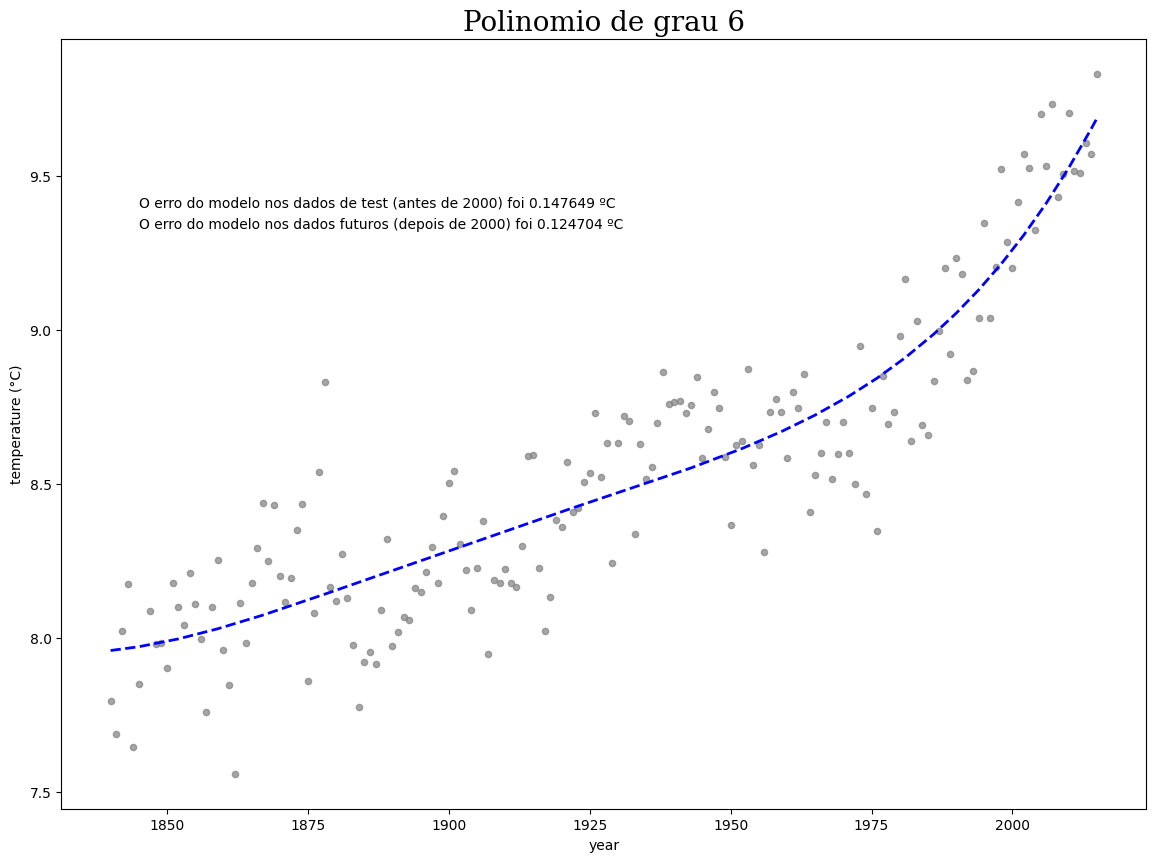

In [83]:
years = mean_temp_year.year.values.tolist()
x_alldata = []

for y in years:
    x_alldata.append([y])
    
model6D = make_pipeline(PolynomialFeatures(6), Ridge(alpha=100000000)) 
model6D.fit(x_train, y_train)
D6_all_data = model6D.predict(x_alldata)

plt.xlabel('year')
plt.ylabel('temperature (°C)')
plt.title('Polinomio de grau 6', fontdict = font1)

plt.scatter(mean_temp_year.year, mean_temp_year.LandAverageTemperature, c='grey', alpha = 0.7, s = 20)
plt.plot(mean_temp_year.year, D6_all_data, color='blue', lw = 2, ls = '--')
plt.text(1845, 9.4, 'O erro do modelo nos dados de test (antes de 2000) foi 0.147649 ºC')
plt.text(1845, 9.33, 'O erro do modelo nos dados futuros (depois de 2000) foi 0.124704 ºC')

plt.savefig('6d_model_future.png', format = 'png')
plt.show()